# Foundations of Data Science
## Homework 5: Algorithmic fairness

Student Name: Yamini Lakshmi Narasimhan

***

### Part 1: Algorithmic fairness (15 points)


#### Data acquisition and preparation (4 points)

For this question we will use the "Adult" dataset from the UC Irvine repository.

This data is from the United States census, and we will examine the algorithmic fairness for an income prediction task. For more information about the dataset, see [Here](https://archive.ics.uci.edu/ml/datasets/adult).


1\. Download the data. (1 point)

Load data from the URL using the pandas read_csv method.

In [181]:
#Place code here
import pandas as pd
import io
import requests


url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
url_data = requests.get(url).content
df=pd.read_csv(io.StringIO(url_data.decode('utf-8')), header=None)



In [182]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


2\. If the column headers are not correct, assign names to them (hint: use the readme from the source website). Compute descriptive statistics for the education level. (2 points).

### README FILE

age: continuous. \\
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. \\
fnlwgt: continuous. \\
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. \\
education-num: continuous. \\
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. \\
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. \\
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. \\
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. \\
sex: Female, Male. \\
capital-gain: continuous. \\
capital-loss: continuous. \\
hours-per-week: continuous. \\
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands. \\

In [183]:
#Place code here
df.columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week","native-country", "class"]
df.head()

df.describe(include='all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [184]:
df["education"].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

3\. Select one attribute as protected. Explain the reason why you selected this attribute. (1 point)

Protected attributes require the prefix protected. The outcome attribute requires the prefix target. For example, if you need to measure fairness rankings of a dataset with the columns sex and credit_score, rename the columns to protected_sex and target_credit_Score. Update the column names for our dataset (hint: you may also have to convert the target to a binary variable and create dummy variables for those that are categorical, for upcoming steps). (1 point).

In [185]:
#Place code here
df["protected_sex"] = df["sex"]


cols = ["workclass", "education" ,"marital-status", "occupation", "relationship", "race", "protected_sex", "native-country"]
df = pd.get_dummies(df, columns=cols)

df["class_binary"] = 0
df.loc[(df["class"]==' >50K'),"class_binary"] = 1


df.drop(columns=["sex","class"], inplace=True)

In [186]:
df["class_binary"].value_counts()

0    24720
1     7841
Name: class_binary, dtype: int64

There is race and gender that cna be chosen because I do not want the model to be biased towards that and to avoid Disparate treatment towards a particular class

But since here they have asked only one I chose gender since we are well aware of gender disparity in salaries

#### Build a Classifier (5 points)

4\. Select a type of classifier to build for the income prediction task. Give reasoning for why you picked this type. (1 point)

I chose decision tree because its 
1. fast, 
2. there are not many attributes so its a lot simpler 
3. only 2 classes so can easily classify them
4. lot of categorical variables so to split and to visualise will be easy 

The training data is highly imbalanced I was thinking of Decision tree classifier but decision tree classifier are not sensitive to imbalanced datasets so tried XGB Boost and added balancing factor to it

5\. Split the data into training and testing. Use pandas to create two data frames: train_df and test_df, where train_df has 80% of the data chosen uniformly at random without replacement (test_df should have the other 20%). Also, make sure to write your own code to do the splits. You may use any random() function numpy but do not use the data splitting functions from Sklearn. (1 point)


In [187]:
#Place code here
import numpy as np
percent = np.random.rand(len(df)) <= 0.8 
train_df = df[percent]
test_df = df[~percent]

In [188]:
df["class_binary"].value_counts()

0    24720
1     7841
Name: class_binary, dtype: int64

6\. On the training set, implement your classifier. Give reasoning for your choice of any hyperparameter(s). (1 point)

Chose the balancing factor in xgb model as the dataset is highly imbalanced and also ran it through gridcv for it to choose the right hyperparameters

For decision tree chose min_samples_leaf 40 and min_samples_split 100 because dataset has around 30,000 data points and i did not want it to overfit

In [189]:
# DECISION TREE CLASSIFIER
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
dtc = DecisionTreeClassifier(criterion='entropy', min_samples_leaf = 40, min_samples_split=100) 

train_X = train_df.loc[:, train_df.columns != "class_binary"] 
train_Y = train_df["class_binary"]

test_X = test_df.loc[:, test_df.columns != "class_binary"] 
test_Y = test_df["class_binary"]

dtc.fit(train_X, train_Y)

predtest_Y = dtc.predict(test_X)
print("Test Accuracy", accuracy_score(test_Y, predtest_Y))


Test Accuracy 0.8619201725997843


In [190]:
# XGB CLASSIFIER
xgb_model = xgb.XGBClassifier(booster = 'dart', eta = 0.4, max_depth = 2, objective="binary:logistic")
eval_set = [(train_X, train_Y), (test_X, test_Y)]
xgb_model.fit(train_X, train_Y, eval_set=eval_set, eval_metric=["error", "logloss"])
predtest_Y = xgb_model.predict(test_X)
acc = accuracy_score(test_Y, predtest_Y)
print(acc)

[0]	validation_0-error:0.173213	validation_0-logloss:0.645718	validation_1-error:0.165973	validation_1-logloss:0.644729
[1]	validation_0-error:0.173136	validation_0-logloss:0.606959	validation_1-error:0.167514	validation_1-logloss:0.605218
[2]	validation_0-error:0.157986	validation_0-logloss:0.574431	validation_1-error:0.149176	validation_1-logloss:0.571719
[3]	validation_0-error:0.157986	validation_0-logloss:0.547022	validation_1-error:0.149176	validation_1-logloss:0.543723
[4]	validation_0-error:0.157986	validation_0-logloss:0.523398	validation_1-error:0.149176	validation_1-logloss:0.519582
[5]	validation_0-error:0.157986	validation_0-logloss:0.503361	validation_1-error:0.149176	validation_1-logloss:0.4989
[6]	validation_0-error:0.157986	validation_0-logloss:0.485912	validation_1-error:0.149176	validation_1-logloss:0.480983
[7]	validation_0-error:0.157986	validation_0-logloss:0.470985	validation_1-error:0.149176	validation_1-logloss:0.465536
[8]	validation_0-error:0.157986	validation

In [191]:
# GRID SEARCH XGB CLASSIFIER
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.model_selection import GridSearchCV
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

parameters = {
    'max_depth': range (2),
    'n_estimators': range(60),
    'learning_rate': [0.1]
}
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)
sample_weights = compute_sample_weight(
    class_weight='balanced',
    y=train_Y
)

grid_search.fit(train_X, train_Y, sample_weight=sample_weights)
print(grid_search.best_params_)
grid_search.score(test_X, test_Y)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits
{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 57}


0.9033226905320205

90.33% accuracy xgboost model compared to decision tree of 86.2%

7\. To demonstrate the performance of your classifier, we will now plot the AUROC. Below are two functions which you can use. What you need to add is code to plot the AUROC for all the data and as well for each value of the protected attribute (on one set of axes). (2 points)

<ipython-input-200-e5e84d334034>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["prediction"] = predtest_Y
<ipython-input-200-e5e84d334034>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["score"] = grid_search.predict_proba(test_X)[:,1]


All  0.9033226905320205
Male  0.8797646810657971
Female  0.9332041001170831


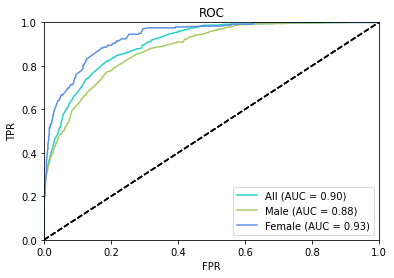

In [200]:
#Code for computing the AUCROC

from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

def getAUC(truth, pred):
    fpr, tpr, thresholds = roc_curve(truth, pred)
    return auc(fpr, tpr)


def plotAUC(truth, pred, lab):
    fpr, tpr, thresholds = roc_curve(truth, pred)
    roc_auc = auc(fpr, tpr)
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color=c, label= lab+' (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC')
    plt.legend(loc="lower right")




test_df["prediction"] = predtest_Y
test_df["score"] = grid_search.predict_proba(test_X)[:,1]

# For all values
print("All ", getAUC(test_Y, test_df["score"]))
plotAUC(test_Y, test_df["score"],'All')


# For every value in protected attribute
print("Male ", getAUC(test_df[test_df["protected_sex_ Male"]==1]["class_binary"],test_df[test_df["protected_sex_ Male"]==1]["score"]))
plotAUC(test_df[test_df["protected_sex_ Male"]==1]["class_binary"],test_df[test_df["protected_sex_ Male"]==1]["score"],'Male')


print("Female ",getAUC(test_df[test_df["protected_sex_ Female"]==1]["class_binary"],test_df[test_df["protected_sex_ Female"]==1]["score"]))
plotAUC(test_df[test_df["protected_sex_ Female"]==1]["class_binary"],test_df[test_df["protected_sex_ Female"]==1]["score"],'Female')
plt.show()


#### Assessing algorithmic fairness (5 points)

8\. Algorithmic Fairness metrics (2 points) 

Pick a fairness metric to apply to the income prediction task and your selected protected attribute. Explain why you selected this metric. 

### ANSWER
Statistical parity, 
Equalized odds,
Equality of opportunity,
Calibration


With all the possibilities, Statistical parity is what I am favouring because I want to know if irrespective of sex the people belong to the same income bracket or not and SPD helps in even understanding which group is underpriveleged or priveleged based on the sign of value. We can also determine the impact by calculating disparate impact ratio

SPD = P(Y pred =1 ∣ A=minority)−P(Y pred=1 ∣ A=majority)

9\. Compute the chosen metric for your protected attribute. Hint: this will require you to first find the threshold wiith the best when predicting on the entire data, and then computing the TPR/FPR or other necessary parameters at that threshold for each value of the protected attribute. (2 points)

There are many ways we could locate the threshold with the optimal balance between the false positive rate (FPR) and true positive rate (TPR).

As a reminder, the TPR is called the Sensitivity. The inverse of the false-positive rate (1-FPR) is called the Specificity.

<center>Sensitivity = $\frac{TP}{TP + FN}$
Specificity = $\frac{TN}{FP + TN}$</center>

where:

<center>Sensitivity = TPR and Specificity = 1 – FPR</center>

The Geometric Mean or g-mean is a metric for imbalanced classification that, if optimized, will seek a balance between the sensitivity and the specificity.

<center>g-mean = $\sqrt{Sensitivity * Specificity}$ </center>



Using Imblearn Package

In [201]:
from imblearn.metrics import geometric_mean_score
import math
result_proba = grid_search.predict_proba(test_X)
df_threshold = pd.DataFrame()
threshold_lis = []
gmean = []

for i in range(0,100,1):
  threshold = i/100
  threshold_lis.append(threshold)
  result_boolean2 = (result_proba[:,1] > threshold) 
  gmean.append(geometric_mean_score(test_Y,result_boolean2))
df_threshold["threshold"] = threshold_lis
df_threshold["gmean"] = gmean


df_threshold

,threshold,gmean
0,0.00,0.000000
1,0.01,0.000000
2,0.02,0.000000
3,0.03,0.000000
4,0.04,0.000000
...,...,...
95,0.95,0.284935
96,0.96,0.249091
97,0.97,0.000000
98,0.98,0.000000


Withot imblearn and manually calcuating

In [202]:
import math
result_proba = grid_search.predict_proba(test_X)
df_threshold = pd.DataFrame()
threshold_lis = []
gmean = []

for i in range(0,100,1):
  threshold = i/100
  threshold_lis.append(threshold)
  y_pred = (result_proba[:,1] > threshold) 
  y_true = test_Y

  fp = np.sum((y_pred == 1) & (y_true == 0))
  tp = np.sum((y_pred == 1) & (y_true == 1))

  fn = np.sum((y_pred == 0) & (y_true == 1))
  tn = np.sum((y_pred == 0) & (y_true == 0))

  fpr = fp / (fp + tn)
  tpr = tp / (tp + fn)
  gmean.append(math.sqrt((1-fpr)*tpr))

df_threshold["threshold"] = threshold_lis
df_threshold["gmean"] = gmean


df_threshold

,threshold,gmean
0,0.00,0.000000
1,0.01,0.000000
2,0.02,0.000000
3,0.03,0.000000
4,0.04,0.000000
...,...,...
95,0.95,0.284935
96,0.96,0.249091
97,0.97,0.000000
98,0.98,0.000000


### ANSWER
0.56 is a threshold that gives the highest geometric mean between sensitivy and specificity, so considering that threshold


P(Y pred =1 ∣ A=minority)−P(Y pred=1 ∣ A=majority)

In [203]:
test_df["prediction_threshold"] =0
test_df.loc[(test_df["score"]>0.56),"prediction_threshold"] = 1

test_minority = test_df[test_df["protected_sex_ Female"]==1]
test_minority_class_binary = test_minority[test_minority["prediction_threshold"]==1] 


test_majority = test_df[test_df["protected_sex_ Male"]==1]
test_majority_class_binary = test_majority[test_majority["prediction_threshold"]==1] 


<ipython-input-203-2e47796b02fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["prediction_threshold"] =0
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [204]:
SPD = len(test_minority_class_binary)/len(test_minority) - len(test_majority_class_binary)/len(test_majority)
print(SPD)

-0.33824944428794945


10\. Is there a disparity? How can we interpret its magnitude? Is such a disparity a bad thing/avoidable? (1 point)

### ANSWER
There is disparity, so SPD should be 0 for it to be fair but in our case it is 0.366 which means there is disparity of income bracket between men and women

-0.338 when it is supposed to be 0 shows the magnitude of it. A negative value of statistical parity difference indicates that the unprivileged group is at a disadvantage and a positive value indicates that the privileged group is at a disadvantage.


it is sessentially calculating probabilities of a positive outcome across two groups and if its negative shows how much of disparity exists like in our case underpriveleged that is women here experiety parity difference

Disparity is quite bad as it shows that women are less likely to have an income range in the >50K bracket though they are equally qualified as men. And when an ML model 

Disparate Impact (DI) compares the proportion of individuals that receive a favorable outcome for two groups, a majority group and a minority group. This measure must be equal to 1 to be fair.


In [198]:
DI = len(test_minority_class_binary)/len(test_minority)/len(test_majority_class_binary)/len(test_majority)
print(DI)

1.5429836854912323e-08


### ANSWER
Value for DI was supposed to be 1 for the model to be fair but here its close to 0 so its not

Here, a value of  indicates fairness, values less than  indicate disadvantage faced by the unprivileged group, and values greater than  indicate disadvantage faced by the privileged group. The disparate impact ratio is also sometimes known as the relative risk ratio or the adverse impact ratio.

Other Fairness Metrics

Equal Opportunity Difference (EOD) measures the deviation from the equality of opportunity, which means that the same proportion of each population receives the favorable outcome. This measure must be equal to 0 to be fair.

In [199]:
test_minority_prediction = test_df[test_df["protected_sex_ Female"]==1]
test_minority_class_gt = test_minority_prediction[test_minority_prediction["class_binary"]==1] 
test_minority = test_minority_class_gt[test_minority_class_gt["prediction_threshold"]==1] 


test_majority_prediction = test_df[test_df["protected_sex_ Male"]==1]
test_majority_class_gt = test_majority_prediction[test_majority_prediction["class_binary"]==1] 
test_majority = test_majority_class_gt[test_majority_class_gt["prediction_threshold"]==1] 

EOD = len(test_minority)/len(test_minority_class_gt) - len(test_majority)/len(test_majority_class_gt)
print(EOD)

-0.17569976822963096


Value for EOD was supposed to be 0 for the model to be fair but here its 0.27 indicating it is no fair